In [1]:
import numpy as np


X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([[0],
              [1],
              [1],
              [0]])


In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


In [3]:
np.random.seed(0)


input_layer_neurons = 2
hidden_layer_neurons = 2
output_neurons = 1


wh = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons)) 
bh = np.random.uniform(size=(1, hidden_layer_neurons))                    
wo = np.random.uniform(size=(hidden_layer_neurons, output_neurons))       
bo = np.random.uniform(size=(1, output_neurons))                           


lr = 0.1
epochs = 10000

for epoch in range(epochs):
    
    zh = np.dot(X, wh) + bh
    ah = sigmoid(zh)

    zo = np.dot(ah, wo) + bo
    ao = sigmoid(zo)

   
    error = y - ao
    d_output = error * sigmoid_derivative(ao)

    error_hidden = d_output.dot(wo.T)
    d_hidden = error_hidden * sigmoid_derivative(ah)

   
    wo += ah.T.dot(d_output) * lr
    bo += np.sum(d_output, axis=0, keepdims=True) * lr
    wh += X.T.dot(d_hidden) * lr
    bh += np.sum(d_hidden, axis=0, keepdims=True) * lr

    if epoch % 1000 == 0:
        loss = np.mean(np.square(error))
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 0, Loss: 0.3907
Epoch 1000, Loss: 0.2483
Epoch 2000, Loss: 0.2365
Epoch 3000, Loss: 0.1911
Epoch 4000, Loss: 0.1188
Epoch 5000, Loss: 0.0299
Epoch 6000, Loss: 0.0124
Epoch 7000, Loss: 0.0073
Epoch 8000, Loss: 0.0050
Epoch 9000, Loss: 0.0038


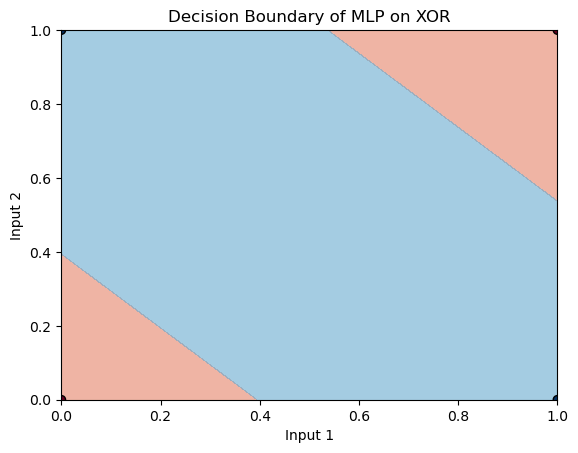

In [4]:
import matplotlib.pyplot as plt


xx, yy = np.meshgrid(np.linspace(0, 1, 100),
                     np.linspace(0, 1, 100))
grid = np.c_[xx.ravel(), yy.ravel()]


zh = np.dot(grid, wh) + bh
ah = sigmoid(zh)
zo = np.dot(ah, wo) + bo
ao = sigmoid(zo)
Z = ao.reshape(xx.shape)


plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.6, cmap='RdBu')
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='RdBu', edgecolors='k')
plt.title("Decision Boundary of MLP on XOR")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.show()
